In [1]:
## Loading in dependencies
import os
import pandas as pd
import numpy as np

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
import datetime
from PIL import Image
from PIL import Image
from numpy import asarray


C:\Users\Jordan\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jordan\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jordan\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jordan\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images
uint8
(450, 600, 3)


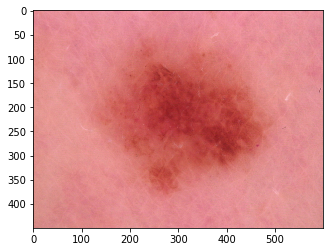

In [2]:
## Example of an image from the dataset
from matplotlib import image
from matplotlib import pyplot
%matplotlib inline

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images
# load image as pixel array
data = image.imread('ISIC_0029307.jpg')
# summarize shape of the pixel array

print(data.dtype)
print(data.shape)

# display the array of pixels as an image
# data type = 8-bit unsigned integer 
pyplot.imshow(data)
pyplot.show()

In [3]:
%cd "C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images_part_1"


##Grabbing pic names for import later
pic_names = []

for i, j in enumerate (os.listdir()):
    pic_names.append(j)

C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images_part_1


In [4]:
%cd "C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images_part_2"


##Doing the same thing and adding it to the previous list
for i, j in enumerate (os.listdir()):
    pic_names.append(j)

C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images_part_2


In [5]:
%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images

    
## Same thing as earlier cells, but the images have been put in one folder
pic_names = []

for i, j in enumerate (os.listdir()):
    pic_names.append(j)

C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images


In [6]:
## We have 10,015 images to work with
len(pic_names)

10015

In [50]:
## But we don't know their classes...But we do have a metadata csv with their diagnosis (class) attached. 

%cd "C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject"
metadf= pd.read_csv("HAM10000_metadata.csv")

print(metadf.shape)
metadf.head()

C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject
(10015, 7)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


### Quick Exploratory Data Analysis

Text(0.5, 1.0, 'Labels for Skin Cancer')

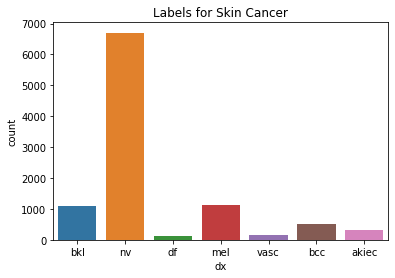

In [9]:
## Visualizing classes
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(metadf.dx)
plt.title('Labels for Skin Cancer')

## As we can see we have very imblanced classes

Text(0.5, 1.0, 'Labels for Skin Cancer')

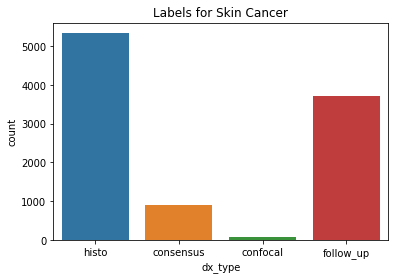

In [10]:
## Graphing dx_type
sns.countplot(metadf.dx_type)
plt.title('How the Diagnosis was made')

## Most diagnosises were made by histopathology, followed by follow-up

[Text(0, 0, 'scalp'),
 Text(0, 0, 'ear'),
 Text(0, 0, 'face'),
 Text(0, 0, 'back'),
 Text(0, 0, 'trunk'),
 Text(0, 0, 'chest'),
 Text(0, 0, 'upper extremity'),
 Text(0, 0, 'abdomen'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'lower extremity'),
 Text(0, 0, 'genital'),
 Text(0, 0, 'neck'),
 Text(0, 0, 'hand'),
 Text(0, 0, 'foot'),
 Text(0, 0, 'acral')]

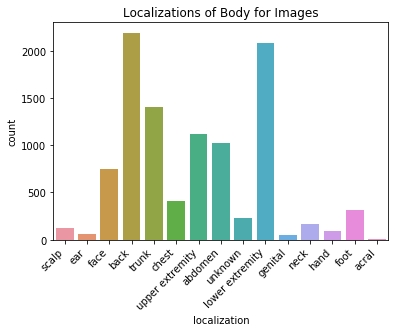

In [14]:
## Graphing localization
chart = sns.countplot(metadf.localization)
plt.title('Localizations of Body for Images')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
## Most diagnosises were made by histopathology, followed by follow-up

Text(0.5, 1.0, 'Distribution of Sex for Images')

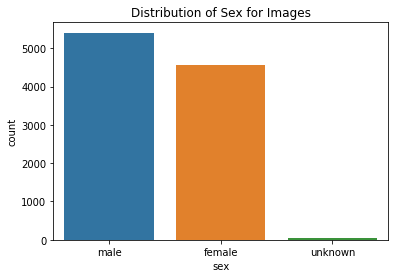

In [20]:
## Graphing sex
sns.countplot(metadf.sex)
plt.title('Distribution of Sex for Images')

## It's fairly even, but more of the images belong to males. Some of the images have an unknown sex

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

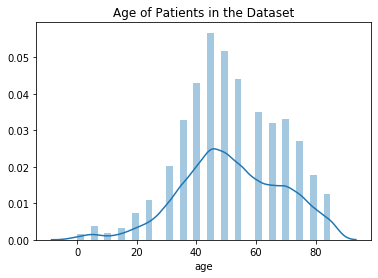

In [18]:
## Graphing ages
sns.distplot(metadf.age.dropna())
plt.title('Age of Patients in the Dataset')


## Most diagnosises were made by histopathology, followed by follow-up

metadf.age.describe()

##The mean age is 51, age 0 is listed. Max age is 85.

In [51]:
## Subsetting for only the image if and dx
metadf = metadf[['image_id', 'dx']]

## Distribution of dx and their counts
metadf.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [52]:
## Create dictionary for labels so that we can map labels/classes to them

labeldict ={'akiec':0,
            'bcc': 1,
            'bkl': 2,
            'df': 3,
            'nv': 4,
            'vasc': 5,
            'mel': 6}

## Using the dictionary to create a label column and mapping it from the dx column
metadf['label'] = metadf.dx.map(labeldict)

## Making sure that the labels match the dx column
metadf.label.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [53]:
## Still the same amount of images
len(metadf.label.tolist())

10015

### Reading in the images and pre-processing them

In order to feed a CNN data, we need to manipulate the data so that we have channels (3 for color, 1 for black and white). But we need to manipulate the images so that we can feed it into the neural network.

C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images
uint8
(188, 250, 3)


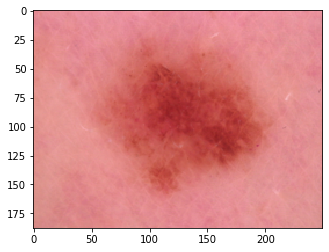

In [25]:
## Example of re-sizing the image so that we don't encounter a memory error (which we do with the original dimensions)

## Import dependicies
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
import datetime
from PIL import Image
from PIL import Image
from numpy import asarray

## Changing directory to image location
%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images

## Open the image
image = Image.open('ISIC_0029307.jpg')

## Re-size the image
image.thumbnail((250,250))

## Turn image into pixel arrays
data = asarray(image)

## dtype for data array
print(data.dtype)

## New shape is an ndarray (188, 250, 3). The 3 is the RGB spectrum.
print(data.shape)

## Show the image
pyplot.imshow(data)

In [54]:
## We're really low images for certain classes--we're going to manipulate the images that we already have so that we can 
## generate more images to balance the classes more. 
metadf0 = metadf[metadf['label'] == 0]
metadf1 = metadf[metadf['label'] == 1]
metadf2 = metadf[metadf['label'] == 2]
metadf3 = metadf[metadf['label'] == 3]
metadf4 = metadf[metadf['label'] == 4]
metadf5 = metadf[metadf['label'] == 5]
metadf6 = metadf[metadf['label'] == 6]

metalist = [metadf0, metadf1,metadf2,metadf3,metadf4, metadf5, metadf6]

for i in metalist:
            print(i.shape)
metadf1.head()

## Class 4 has the most classes out of anyone. They are Melanocytic nevi, or birthmarks/moles. They are usually benign. 

(327, 3)
(514, 3)
(1099, 3)
(115, 3)
(6705, 3)
(142, 3)
(1113, 3)


,image_id,dx,label
2462,ISIC_0028155,bcc,1
2463,ISIC_0034093,bcc,1
2464,ISIC_0029230,bcc,1
2465,ISIC_0031513,bcc,1
2466,ISIC_0032384,bcc,1


In [ ]:
## Import Dependicies
from numpy import expand_dims
from matplotlib import pyplot
from matplotlib.pyplot import figure
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

## Here, we're defining an data generator in order to create more images

##file path to save
save_path = r'C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_0'

# create image data augmentation generator for the underpresented classes
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
height_shift_range=0.1,shear_range=0.15, 
zoom_range=0.1,channel_shift_range = 10, horizontal_flip=True)

## Creating function to augment images
def image_augment(i,j):
    img = load_img(i + '.jpg')## i is the image that we'll iterate over

    # convert to numpy array
    data = img_to_array(img)

    # expand dimension to one sample
    samples = expand_dims(data, 0)
    
    ## j is the 'range' of number of times that we'll augment a specific image. it works out to be the inital number of 
    # images of that class times 3
    for i in range(j):  

        # generate batch of images
        it = datagen.flow(samples, batch_size=1, save_to_dir= save_path,save_format='jpg')
        
        batch = it.next()
    
        

for i in metadf0['image_id']:
    image_augment(i,9) ## There are 327 images in class 0. If the highest class(4) is approx. 6700, let's shoot for times 9
                        # (which is 2,943)







In [ ]:
save_path = r'C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_1'
for i in metadf1['image_id']: ## 514 images in class 1. Let's iterate 5 times for 2,570 images
    image_augment(i,5)
    
save_path = r'C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_2'
for i in metadf2['image_id']: ## 1099 images in class 2. Let's iterate 3 times for 3,297 images
    image_augment(i,3)

save_path = r'C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_3'
for i in metadf3['image_id']: ## class 3 has 115 images. Let's iterate 27 times for 3,105 images
    image_augment(i,27)

save_path = r'C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_5'
for i in metadf5['image_id']:## class 5 has 142 images. Let's iterate 20 times for 2,840 images 
    image_augment(i,20)

save_path = r'C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_6'
for i in metadf6['image_id']: # class 6 has 1113 images. Let's iterate 3 times for 3,339 images
    image_augment(i,3)

In [55]:
## Now, we'll load in those augmented images by pullin in their name and their labels (since we know what classes 
## they belong to). 

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_0

aug_pic_names0, aug_pic_names1, aug_pic_names2, aug_pic_names3, aug_pic_names5, aug_pic_names6 = [],[],[],[],[],[]
aug_labels = []

for i, j in enumerate (os.listdir()):
    aug_pic_names0.append(j)
    aug_labels.append(0)

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_1
for i, j in enumerate (os.listdir()):
    aug_pic_names1.append(j)
    aug_labels.append(1)
    
%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_2
for i, j in enumerate (os.listdir()):
    aug_pic_names2.append(j)
    aug_labels.append(2)
    
%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_3
for i, j in enumerate (os.listdir()):
    aug_pic_names3.append(j)
    aug_labels.append(3)
    
%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_5
for i, j in enumerate (os.listdir()):
    aug_pic_names5.append(j)
    aug_labels.append(5)
    
%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_6
for i, j in enumerate (os.listdir()):
    aug_pic_names6.append(j)
    aug_labels.append(6)

C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_0
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_1
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_2
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_3
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_5
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_6


In [68]:
import datetime
print(datetime.datetime.now())
X = [] #empty list for images (feature space)

##Changing directory to load in original images
%cd "C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images"

## Loading in original images
for i in metadf['image_id']:
    # load the image
    image = Image.open(i + '.jpg')


    # create a thumbnail and preserve aspect ratio
    image.thumbnail((100,100)) ## Doing a thumnail changes the image to (100, 75)

    # convert image to a numpy array
    data = asarray(image)
    
    # append the data
    X.append(data)

    
print(datetime.datetime.now())

## Defining function in order to do the same as above to load in all of the augmented images
def imageload_resize(i, list_of_pics):
    for i in list_of_pics:
        # load the image
        image = Image.open(i)


        # create a thumbnail and preserve aspect ratio
        image.thumbnail((100,100)) ## Doing a thumnail changes the image to (100, 75)

        # convert image to a numpy array
        data = asarray(image)
    
        # append the data
        X.append(data)

        
## Doing all the augmented images
%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_0
imageload_resize(i,aug_pic_names0)
print(datetime.datetime.now())

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_1
imageload_resize(i,aug_pic_names1)
print(datetime.datetime.now())

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_2
imageload_resize(i,aug_pic_names2)
print(datetime.datetime.now())

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_3
imageload_resize(i,aug_pic_names3)
print(datetime.datetime.now())

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_5
imageload_resize(i,aug_pic_names5)
print(datetime.datetime.now())

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_6
imageload_resize(i,aug_pic_names6)
print(datetime.datetime.now())

2020-05-10 16:00:59.581753
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images
2020-05-10 16:01:58.470646
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_0
2020-05-10 16:02:03.415093
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_1
2020-05-10 16:02:07.718184
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_2
2020-05-10 16:02:13.272299
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_3
2020-05-10 16:02:18.414338
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_5
2020-05-10 16:02:22.823713
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_6
2020-05-10 16:02:29.024538


In [69]:
## Length of images and type of variables X
print(len(X))
type(X)

25615


list

In [70]:
## Example of first image in the list as an ndarray
X[0]

array([[[190, 152, 194],
        [192, 154, 195],
        [191, 153, 196],
        ...,
        [194, 152, 161],
        [193, 152, 162],
        [195, 157, 169]],

       [[190, 145, 188],
        [191, 149, 185],
        [192, 154, 194],
        ...,
        [194, 153, 159],
        [193, 150, 160],
        [194, 153, 163]],

       [[190, 152, 189],
        [193, 154, 188],
        [195, 157, 196],
        ...,
        [194, 151, 155],
        [191, 147, 152],
        [188, 143, 152]],

       ...,

       [[171, 137, 172],
        [177, 144, 175],
        [182, 147, 176],
        ...,
        [188, 156, 180],
        [186, 154, 179],
        [185, 152, 176]],

       [[165, 131, 164],
        [171, 137, 167],
        [177, 141, 169],
        ...,
        [185, 152, 174],
        [184, 150, 174],
        [182, 149, 168]],

       [[159, 124, 155],
        [164, 127, 154],
        [169, 131, 154],
        ...,
        [186, 156, 184],
        [185, 156, 184],
        [180, 148, 166]]

In [71]:
## combining the labels to create one giant list
metalabel = metadf.label.tolist()

new_labels = metalabel + aug_labels

len(new_labels) ## We have 25,615 images to work with right now. 

25615

Text(0.5, 1.0, 'Labels for Skin Cancer')

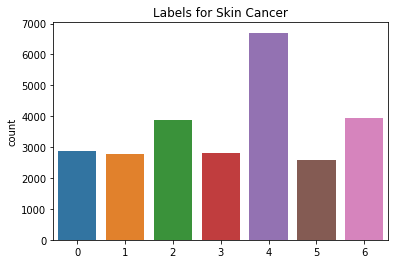

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(new_labels)
plt.title('Labels for Skin Cancer')

## We still have a fairly imblanced class with class 4...we're going to downsample that to 4000 to have it more equal
## And improve processing time

In [73]:
type(X)

list

In [74]:
## Subsetting for just class 4
metadf4 = metadf[metadf['label'] == 4]

## Re-setting dataframe without class 4
metadf = metadf[metadf.label != 4]

#Randomly sampling for 4000 out of almost 7000 images
metadf4 = metadf4.sample(n = 4000)

#Appending the new selection of class 4 images to the other images
metadf = metadf.append(metadf4)

In [75]:
## Re-doing the above but with the downsampled class 4
import datetime
print(datetime.datetime.now())
X = [] #empty list for images (feature space)

##Changing directory to load in original images
%cd "C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images"

## Loading in original images
for i in metadf['image_id']:
    # load the image
    image = Image.open(i + '.jpg')


    # create a thumbnail and preserve aspect ratio
    image.thumbnail((100,100)) ## Doing a thumnail changes the image to (600, 450)

    # convert image to a numpy array
    data = asarray(image)
    
    # append the data
    X.append(data)

    
print(datetime.datetime.now())

## Defining function in order to do the same as above to load in all of the augmented images
def imageload_resize(i, list_of_pics):
    for i in list_of_pics:
        # load the image
        image = Image.open(i)


        # create a thumbnail and preserve aspect ratio
        image.thumbnail((100,100)) ## Doing a thumnail changes the image to (600, 450)

        # convert image to a numpy array
        data = asarray(image)
    
        # append the data
        X.append(data)

        
## Doing all the augmented images
%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_0
imageload_resize(i,aug_pic_names0)
print(datetime.datetime.now())

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_1
imageload_resize(i,aug_pic_names1)
print(datetime.datetime.now())

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_2
imageload_resize(i,aug_pic_names2)
print(datetime.datetime.now())

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_3
imageload_resize(i,aug_pic_names3)
print(datetime.datetime.now())

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_5
imageload_resize(i,aug_pic_names5)
print(datetime.datetime.now())

%cd C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_6
imageload_resize(i,aug_pic_names6)
print(datetime.datetime.now())

2020-05-10 16:07:34.649982
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM10000_images
2020-05-10 16:08:21.028365
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_0
2020-05-10 16:08:26.007970
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_1
2020-05-10 16:08:30.315024
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_2
2020-05-10 16:08:35.899096
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_3
2020-05-10 16:08:41.074168
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_5
2020-05-10 16:08:45.602260
C:\Users\Jordan\Desktop\DATA 902 Analytics Methods\CNNProject\HAM1000_images_augmented\augment_6
2020-05-10 16:08:51.718360


In [76]:
## Length of images and type of variables X
print(len(X))
type(X)

22910


list

In [79]:
## combining the labels to create one giant list
metalabel = metadf.label.tolist()

new_labels = metalabel + aug_labels

len(new_labels) ## We have successfully downsampled class 4

22910

Text(0.5, 1.0, 'Downsampled Labels for Skin Cancer')

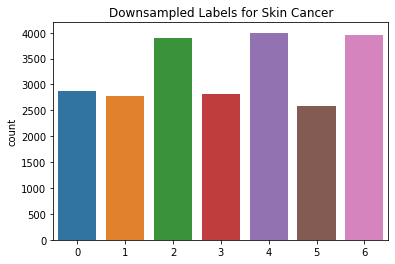

In [80]:
sns.countplot(new_labels)
plt.title('Downsampled Labels for Skin Cancer')


In [81]:
## Transforming X and Y to numpy arrays to feed into the CNN
X = np.array(X)
Y = np.array(new_labels)

In [82]:
## Shape of X and Y. 25615 rows, 3 RGB channels. 
print("The shape of X is {}:".format(X.shape))
print("The shape of Y is {}:".format(Y.shape))

The shape of X is (22910, 75, 100, 3):
The shape of Y is (22910,):


In [83]:
## X is a list of numpy arrays
print(type(X))
print(X[0])

<class 'numpy.ndarray'>
[[[190 152 194]
  [192 154 195]
  [191 153 196]
  ...
  [194 152 161]
  [193 152 162]
  [195 157 169]]

 [[190 145 188]
  [191 149 185]
  [192 154 194]
  ...
  [194 153 159]
  [193 150 160]
  [194 153 163]]

 [[190 152 189]
  [193 154 188]
  [195 157 196]
  ...
  [194 151 155]
  [191 147 152]
  [188 143 152]]

 ...

 [[171 137 172]
  [177 144 175]
  [182 147 176]
  ...
  [188 156 180]
  [186 154 179]
  [185 152 176]]

 [[165 131 164]
  [171 137 167]
  [177 141 169]
  ...
  [185 152 174]
  [184 150 174]
  [182 149 168]]

 [[159 124 155]
  [164 127 154]
  [169 131 154]
  ...
  [186 156 184]
  [185 156 184]
  [180 148 166]]]


In [84]:
from sklearn.utils import shuffle
import numpy as np

X, Y = shuffle(X, Y)

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 22)

In [86]:
X_train.shape

(18328, 75, 100, 3)

In [89]:
## Checking out division of classes for training
unique, counts = np.unique(y_train, return_counts=True)

dict(zip(unique, counts))

{0: 2345, 1: 2217, 2: 3083, 3: 2263, 4: 3218, 5: 2051, 6: 3151}

In [90]:
## Doing the same for the test
unique1, counts1 = np.unique(y_test, return_counts=True)

dict(zip(unique1, counts1))

{0: 536, 1: 551, 2: 809, 3: 558, 4: 782, 5: 538, 6: 808}

In [131]:
## Re-type the Xtrain and Xtest to float
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')


In [132]:
# normalize to range 0-1 and make the NN run faster
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [94]:
## Delete X and Y to make room for memory and we don't need X and Y anymore
del X
del Y

In [95]:
# Reshape train and test datasets
from keras.utils import to_categorical

# X_train = X_train.reshape((X_train.shape[0], ,600, 3))
# X_test = X_test.reshape((X_test.shape[0], 450, 600, 3))


# one hot encode target values
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [97]:
## Divide the train into train and validate data sets
X_train_o, X_val, y_train_o, y_val = train_test_split(train_norm, Y_train, test_size = 0.20, random_state = 22)

## Modeling phase

Model 1

In [98]:
## Import dependicies
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

# define cnn model
model = Sequential()
# Convolutional layer
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(75, 100, 3)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(Dropout(0.3)) ## Adding dropout
# Pooling layer
model.add(MaxPooling2D((2, 2)))

# # Convolutional layer
model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(75, 100, 3)))
model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(Dropout(0.4)) ## Adding dropout
# Pooling layer
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
# Fully connected layer
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))  
# Output Layer
model.add(Dense(7, activation='softmax'))
# compile model
opt = Adam(0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# The following insures saving newer models in the same file over and over
filepath="CNNtrainingmodel5.10.2020.hdf5"

## create file path to save best model
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True, mode='max')
callbacks_list = [checkpoint]


# Set a learning rate annealer
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=0.00001)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.





In [99]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 100, 32)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 37, 50, 64)        0         
__________

In [100]:
# fit model
history = model.fit(X_train_o, y_train_o, epochs=100, batch_size=32, validation_data=(X_val,y_val), callbacks = callbacks_list)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 14662 samples, validate on 3666 samples
Epoch 1/100
14662/14662 [==============================] - 317s 22ms/step - loss: 1.9762 - acc: 0.1763 - val_loss: 1.8994 - val_acc: 0.1814
Epoch 2/100
14662/14662 [==============================] - 317s 22ms/step - loss: 1.9324 - acc: 0.1822 - val_loss: 1.9226 - val_acc: 0.1896
Epoch 3/100
14662/14662 [==============================] - 318s 22ms/step - loss: 1.9210 - acc: 0.1863 - val_loss: 1.9001 - val_acc: 0.2141
Epoch 4/100
14662/14662 [==============================] - 319s 22ms/step - loss: 1.9157 - acc: 0.1895 - val_loss: 1.9141 - val_acc: 0.1994
Epoch 5/100
14662/14662 [==============================] - 315s 21ms/step - loss: 1.8114 - acc: 0.2549 - val_loss: 1.5617 - val_acc: 0.3650
Epoch 6/100
14662/14662 [==============================] - 318s 22ms/step - loss: 1.4493 - acc: 0.4110 - val_loss: 1.3656 - val_acc: 0.4618
Epoch 7/100
14662

KeyboardInterrupt: 

In [101]:
## I stopped the model after 53 epochs. It was clear that is was beginning to overfit and not generalizing well. Regardless
## here it is saved

model.save('model_HMIST_extra_images5.10.2020.h5') ## 64% validation accuracy

Model 2

In [104]:
# define cnn model1

model1 = Sequential()
# Convolutional layer
model1.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(75, 100, 3)))
model1.add(Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model1.add(Dropout(0.3))
# Pooling layer
model1.add(MaxPooling2D((2, 2)))

# # Convolutional layer
model1.add(Conv2D(64, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(75, 100, 3)))
model1.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model1.add(Dropout(0.4))
# Pooling layer
model1.add(MaxPooling2D((2, 2)))


model1.add(Flatten())
# Fully connected layer
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.5))  
# Output Layer
model1.add(Dense(7, activation='softmax'))
# compile model1
opt = Adam(0.001)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# The following insures saving newer model1s in the same file over and over
filepath="CNNDataGenModel5.10.2020.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [106]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 100, 32)       9248      
_________________________________________________________________
dropout_7 (Dropout)          (None, 75, 100, 32)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 50, 64)        36928     
_________________________________________________________________
dropout_8 (Dropout)          (None, 37, 50, 64)        0         
__________

In [114]:
## Now, we're going to fit a data generator to distort the images so that the model trains harder

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train_o)

history1 = model1.fit_generator(datagen.flow(X_train_o,y_train_o, batch_size=32),
                              epochs = 50, validation_data=(X_val, y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] / 32,
                              callbacks=callbacks_list)

Epoch 1/50
573/572 [==============================] - 537s 936ms/step - loss: 0.7200 - acc: 0.7243 - val_loss: 0.7497 - val_acc: 0.7139
Epoch 2/50
573/572 [==============================] - 519s 905ms/step - loss: 0.7077 - acc: 0.7223 - val_loss: 0.7690 - val_acc: 0.6879
Epoch 3/50
573/572 [==============================] - 539s 941ms/step - loss: 0.7094 - acc: 0.7303 - val_loss: 0.6944 - val_acc: 0.7368
Epoch 4/50
573/572 [==============================] - 471s 822ms/step - loss: 0.7313 - acc: 0.7223 - val_loss: 0.6501 - val_acc: 0.7580
Epoch 5/50
573/572 [==============================] - 532s 929ms/step - loss: 0.7127 - acc: 0.7301 - val_loss: 0.8915 - val_acc: 0.6675
Epoch 6/50
573/572 [==============================] - 521s 909ms/step - loss: 0.7049 - acc: 0.7300 - val_loss: 0.7085 - val_acc: 0.7305
Epoch 7/50
573/572 [==============================] - 513s 895ms/step - loss: 0.6990 - acc: 0.7323 - val_loss: 0.6707 - val_acc: 0.7441
Epoch 8/50
573/572 [============================

In [49]:
## highest validation at 74.39% for the first 50 epochs, saving it here
model.save('model_HMIST_extra_images5.11.2020.h5')
    

In [117]:
## highest validation at after 100 epochs was 78.78%, saving it here
model1.save('model_HMIST_extra_images5.11.2020v2.h5')

In [109]:
## history of a model is a dictionary
print(history1.history.keys())
type(history1.history)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


dict

In [111]:
## Creating dataframe from first 50 epochs
historydf = pd.DataFrame.from_dict(history1.history).transpose()
historydf

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
val_loss,1.437880,1.368549,1.323692,1.360472,1.240813,1.196848,1.061241,1.116124,1.039339,1.136094,...,0.937768,0.756604,0.775962,0.730731,0.748093,0.782498,0.696730,0.707640,0.707807,0.803306
val_acc,0.450082,0.495363,0.490726,0.453355,0.516912,0.528914,0.595199,0.568467,0.610475,0.548009,...,0.652209,0.717949,0.701855,0.725859,0.714130,0.706219,0.741408,0.730769,0.736498,0.693944
loss,1.684673,1.403631,1.314647,1.258963,1.205596,1.167749,1.143074,1.098823,1.084407,1.039267,...,0.757391,0.752762,0.750955,0.749336,0.739992,0.739768,0.719024,0.738766,0.719787,0.724499
acc,0.316111,0.438777,0.470180,0.498798,0.520072,0.536537,0.543801,0.561223,0.571046,0.590442,...,0.709910,0.714200,0.711360,0.711961,0.714942,0.711906,0.725177,0.718842,0.722599,0.721628


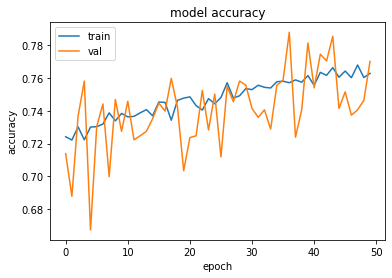

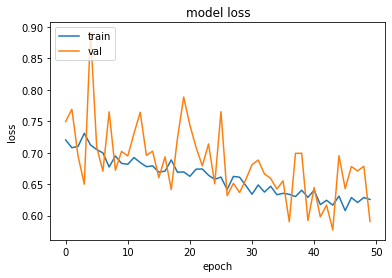

In [149]:
# summarize history for accuracy for second iteration (100 epochs)
## We can see that the model is more temparmental for the validation data
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evauluating models 1 and 2

In [134]:
loss, accuracy = model1.evaluate(test_norm, Y_test, verbose=1)
loss_v, accuracy_v = model1.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = {}  ;  loss_v = {}".format(accuracy_v, loss_v))
print("Test: accuracy = {}  ;  loss = {}".format(accuracy, loss))

3666/3666 [==============================] - 22s 6ms/step
Validation: accuracy = 0.7700490999013689  ;  loss_v = 0.5908037549605216
Test: accuracy = 0.7741161064776934  ;  loss = 0.5905487866497414


In [135]:
loss, accuracy = model.evaluate(test_norm, Y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = {}  ;  loss_v = {}".format(accuracy_v, loss_v))
print("Test: accuracy = {}  ;  loss = {}".format(accuracy, loss))

3666/3666 [==============================] - 22s 6ms/step
Validation: accuracy = 0.6500272777844047  ;  loss_v = 1.4586496025372644
Test: accuracy = 0.6534264513052795  ;  loss = 1.5011170364685424


Model 3

In [125]:
# define cnn model #3
model3 = Sequential()
# Convolutional layer
model3.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(75, 100, 3)))
model3.add(Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model3.add(Dropout(0.3)) ## Adding dropout
# Pooling layer
model3.add(MaxPooling2D((2, 2)))

# # Convolutional layer
model3.add(Conv2D(64, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(75, 100, 3)))
model3.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model3.add(Dropout(0.4)) ## Adding dropout
# Pooling layer
model3.add(MaxPooling2D((2, 2)))


model3.add(Flatten())
# Fully connected layer
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dropout(0.5))  
# Output Layer
model3.add(Dense(7, activation='softmax'))
# compile model
opt = Adam(0.001)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



## Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [126]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 100, 32)       9248      
_________________________________________________________________
dropout_11 (Dropout)         (None, 75, 100, 32)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 37, 50, 64)        36928     
_________________________________________________________________
dropout_12 (Dropout)         (None, 37, 50, 64)        0         
__________

In [127]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train_o)

history3 = model3.fit_generator(datagen.flow(X_train_o,y_train_o, batch_size=32),
                              epochs = 50, validation_data=(X_val, y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] / 32,
                              callbacks=[learning_rate_reduction])

Epoch 1/50
573/572 [==============================] - 460s 803ms/step - loss: 1.7973 - acc: 0.2782 - val_loss: 1.6189 - val_acc: 0.3923
Epoch 2/50
573/572 [==============================] - 441s 769ms/step - loss: 1.4216 - acc: 0.4321 - val_loss: 1.3597 - val_acc: 0.4594
Epoch 3/50
573/572 [==============================] - 495s 864ms/step - loss: 1.2511 - acc: 0.5025 - val_loss: 1.2063 - val_acc: 0.5570
Epoch 4/50
573/572 [==============================] - 483s 844ms/step - loss: 1.1743 - acc: 0.5372 - val_loss: 1.1333 - val_acc: 0.5756
Epoch 5/50
573/572 [==============================] - 474s 827ms/step - loss: 1.1102 - acc: 0.5630 - val_loss: 1.0776 - val_acc: 0.6017
Epoch 6/50
573/572 [==============================] - 448s 783ms/step - loss: 1.0951 - acc: 0.5701 - val_loss: 1.0594 - val_acc: 0.5960
Epoch 7/50
573/572 [==============================] - 459s 802ms/step - loss: 1.0347 - acc: 0.5929 - val_loss: 1.0415 - val_acc: 0.6312
Epoch 8/50
573/572 [============================

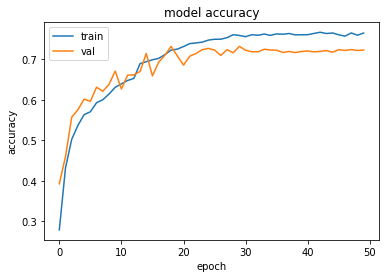

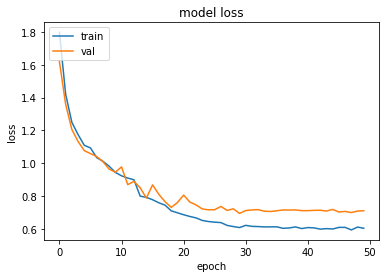

In [151]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model 3 evaulation

In [133]:
loss, accuracy = model3.evaluate(test_norm, Y_test, verbose=1)
loss_v, accuracy_v = model3.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = {}  ;  loss_v = {}".format(accuracy_v, loss_v))
print("Test: accuracy = {}  ;  loss = {}".format(accuracy, loss))

3666/3666 [==============================] - 22s 6ms/step
Validation: accuracy = 0.7231314783855923  ;  loss_v = 0.7122181593818998
Test: accuracy = 0.7178088170844152  ;  loss = 0.7312104126502728


## Evauluating the "best" model (model 1)

Below are cells for confusions matrices, code has been borrowed from this website: https://towardsdatascience.com/a-simple-cnn-multi-image-classifier-31c463324fa

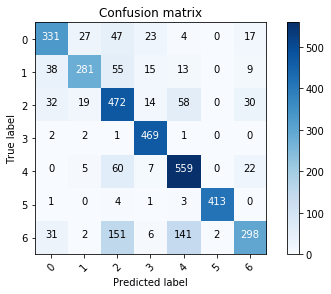

In [171]:
## Plotting the confusion matrix for the validation set
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    ##This function prints and plots the confusion matrix.
    ##Normalization can be applied by setting `normalize=True`.
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model1.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [172]:
## Classification report for the validation set
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(Y_true, np.argmax(Y_pred, axis = 1), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.76      0.74      0.75       449
     class 1       0.84      0.68      0.75       411
     class 2       0.60      0.76      0.67       625
     class 3       0.88      0.99      0.93       475
     class 4       0.72      0.86      0.78       653
     class 5       1.00      0.98      0.99       422
     class 6       0.79      0.47      0.59       631

    accuracy                           0.77      3666
   macro avg       0.80      0.78      0.78      3666
weighted avg       0.78      0.77      0.76      3666



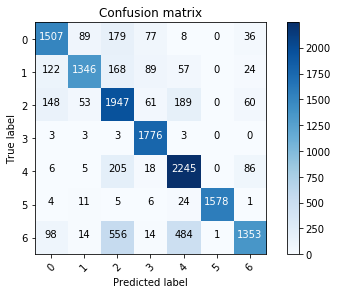

In [163]:
## Confusion matrix for the training data
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    ##This function prints and plots the confusion matrix.
    ##Normalization can be applied by setting `normalize=True`.
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model1.predict(X_train_o)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_train_o,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [170]:
## Classification report for the training data
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(Y_true, np.argmax(Y_pred, axis = 1), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.79      0.80      1896
     class 1       0.88      0.75      0.81      1806
     class 2       0.64      0.79      0.71      2458
     class 3       0.87      0.99      0.93      1788
     class 4       0.75      0.88      0.81      2565
     class 5       1.00      0.97      0.98      1629
     class 6       0.87      0.54      0.66      2520

    accuracy                           0.80     14662
   macro avg       0.83      0.82      0.81     14662
weighted avg       0.82      0.80      0.80     14662



Trying another model with another block (model 4)

In [144]:
# define cnn model #4
model4 = Sequential()
# Convolutional layer
model4.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(75, 100, 3)))
model4.add(Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model4.add(Dropout(0.3)) ## Adding dropout
# Pooling layer
model4.add(MaxPooling2D((2, 2)))

# # Convolutional layer
model4.add(Conv2D(64, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(75, 100, 3)))
model4.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model4.add(Dropout(0.4)) ## Adding dropout
# Pooling layer
model4.add(MaxPooling2D((2, 2)))

# # Convolutional layer
model4.add(Conv2D(128, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(75, 100, 3)))
model4.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model4.add(Dropout(0.4)) ## Adding dropout
# Pooling layer
model4.add(MaxPooling2D((2, 2)))


model4.add(Flatten())
# Fully connected layer
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.5))  
# Output Layer
model4.add(Dense(7, activation='softmax'))
# compile model
opt = Adam(0.001)
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# The following insures saving newer model1s in the same file over and over
filepath="CNNDataGenModelDeep5.11.2020.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True, mode='max')
callbacks_list = [checkpoint]



In [145]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 75, 100, 32)       9248      
_________________________________________________________________
dropout_14 (Dropout)         (None, 75, 100, 32)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 37, 50, 64)        36928     
_________________________________________________________________
dropout_15 (Dropout)         (None, 37, 50, 64)        0         
__________

In [146]:
datagen.fit(X_train_o)

history4 = model4.fit_generator(datagen.flow(X_train_o,y_train_o, batch_size=32),
                              epochs = 50, validation_data=(X_val, y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] / 32,
                              callbacks=callbacks_list)

Epoch 1/50
573/572 [==============================] - 528s 922ms/step - loss: 1.8049 - acc: 0.2599 - val_loss: 1.7012 - val_acc: 0.3107
Epoch 2/50
573/572 [==============================] - 525s 917ms/step - loss: 1.5189 - acc: 0.3930 - val_loss: 1.4671 - val_acc: 0.4056
Epoch 3/50
573/572 [==============================] - 519s 906ms/step - loss: 1.2677 - acc: 0.5001 - val_loss: 1.6638 - val_acc: 0.3366
Epoch 4/50
573/572 [==============================] - 519s 906ms/step - loss: 1.1718 - acc: 0.5327 - val_loss: 2.0153 - val_acc: 0.2589
Epoch 5/50
573/572 [==============================] - 521s 909ms/step - loss: 1.1039 - acc: 0.5609 - val_loss: 1.9085 - val_acc: 0.3123
Epoch 6/50
573/572 [==============================] - 520s 908ms/step - loss: 1.0722 - acc: 0.5682 - val_loss: 1.7110 - val_acc: 0.3631
Epoch 7/50
573/572 [==============================] - 519s 905ms/step - loss: 1.0384 - acc: 0.5836 - val_loss: 1.5187 - val_acc: 0.3898
Epoch 8/50
573/572 [============================

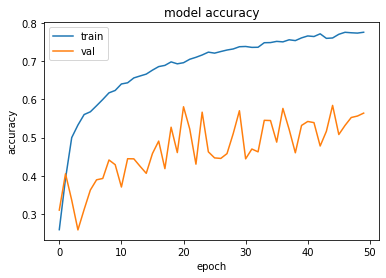

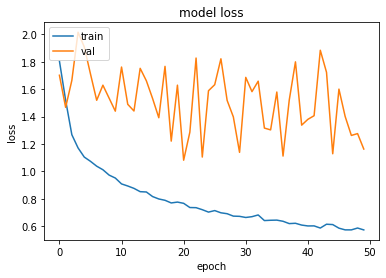

In [152]:
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.load('model_HMIST_extra_imagesv2.h5')